In [1]:
import sympy
from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

from einsteinpy.symbolic.christoffel import ChristoffelSymbols

sympy.init_printing()

In [37]:
# Setup a metric tensor (Guidry problem 7.5)

syms = sympy.symbols("t r theta phi rho")
t, r, th, ph, rho = syms
m = sympy.diag(-1, 1, r ** 2 + rho**2,  (r ** 2 + rho**2)*sin(th)**2 ).tolist()
metric = MetricTensor(m, syms[0:4])

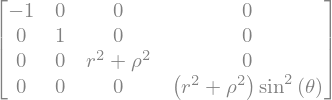

In [38]:
metric.tensor()

In [39]:
# Compute the Christoffel Symbols

cs = ChristoffelSymbols.from_metric(metric)

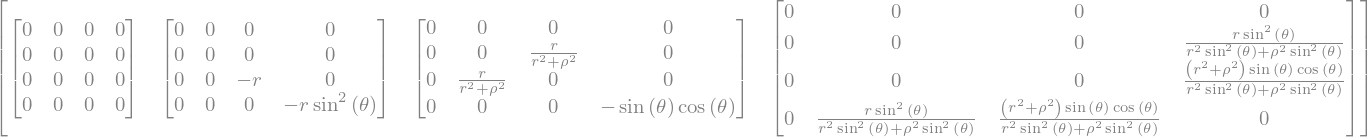

In [40]:
cs.tensor()

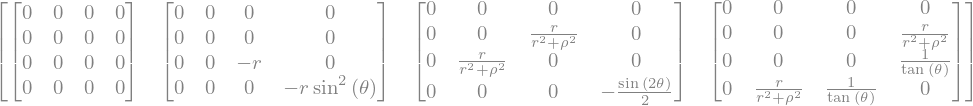

In [41]:
# Note that some expressions can be simplified, so let's do it

from sympy import simplify

simplify(cs.tensor())

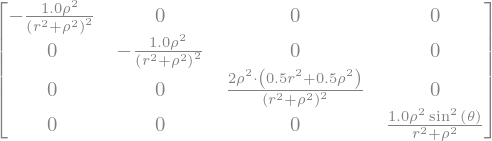

In [43]:
# Comput the Einstein tensor

EinsteinTensor.from_metric(metric).tensor()

In [47]:
# Now set up an oscillating universe (Guidry 7.6)

syms = sympy.symbols("t r theta phi")
t, r, th, ph = syms
m = sympy.diag(-1, sin(t)**2, sin(t)**2, sin(t)**2 ).tolist()
metric = MetricTensor(m, syms)

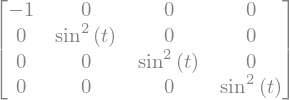

In [48]:
metric.tensor()

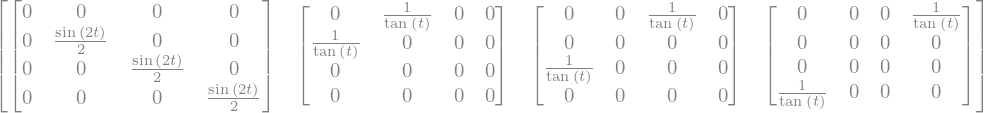

In [49]:
simplify(ChristoffelSymbols.from_metric(metric).tensor())